# Pure Functions

Should have no side effects. It should not modify anything outside its **scope**, including its **inputs*. It should return new copies of inputs instead of changing them

**They have three properties:**

> They always return the <u>same values given the same inputs</u>. They are deterministic

> Running them causes no side <u>effects</u>

> They do not perform any I/O operations (reading from disk, accessing internet, etc.)  

In short:**`Pure functions don't do anything with anything that exists outside their scope`**

### Example of an **impure function**:

In [1]:
# instead of returning a value
# this function modifies a global variable
global_max = float("-inf")
def find_max(nums):
    global global_max
    for num in nums:
        if global_max < num:
            global_max = num

### Example of a **pure function**
This function does not rely on data outside its own *`scope`*, so the variables cannot be modified from the outside. 

In [1]:
def convert_file_format(filename, target_format):
    valid_extensions = ["docx", "pdf", "txt", "pptx", "ppt", "md"]
    valid_conversions = {
    "docx": ["pdf", "txt", "md"],
    "pdf": ["docx", "txt", "md"],
    "txt": ["docx", "pdf", "md"],
    "pptx": ["ppt", "pdf"],
    "ppt": ["pptx", "pdf"],
    "md": ["docx", "pdf", "txt"],
}
    current_format = filename.split(".")[-1]
    if (
        current_format in valid_extensions
        and target_format in valid_conversions[current_format]
    ):
        return filename.replace(current_format, target_format)
    return None

In [3]:
run_cases = [
    ("Proposal.docx", "pdf", "Proposal.pdf"),
    ("Invoice.txt", "md", "Invoice.md"),
]

submit_cases = run_cases + [
    ("Presentation.ppt", "pptx", "Presentation.pptx"),
    ("Intro.pptx", "jpeg", None),
    ("Summary.md", "txt", "Summary.txt"),
    ("Contract.pdf", "pdoof", None),
]


def mutate_globals():
    valid_extensions = ["docx", "txt", "pptx", "ppt", "md"]
    valid_conversions = {
        "docx": ["jpeg"],
        "pdf": ["docx", "txt", "md"],
        "txt": ["docx"],
        "ppt": ["pptx", "jpeg"],
        "md": ["png"],
        "jpeg": ["png"],
    }


def test(input1, input2, expected_output):
    print("---------------------------------")
    print(f"Inputs:")
    print(f" * filename: {input1}")
    print(f" * target_format: {input2}")
    print(f"Expected: {expected_output}")
    result = convert_file_format(input1, input2)
    print(f"Actual:   {result}")
    if result == expected_output:
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    mutate_globals()
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inputs:
 * filename: Proposal.docx
 * target_format: pdf
Expected: Proposal.pdf
Actual:   Proposal.pdf
Pass
---------------------------------
Inputs:
 * filename: Invoice.txt
 * target_format: md
Expected: Invoice.md
Actual:   Invoice.md
Pass
---------------------------------
Inputs:
 * filename: Presentation.ppt
 * target_format: pptx
Expected: Presentation.pptx
Actual:   Presentation.pptx
Pass
---------------------------------
Inputs:
 * filename: Intro.pptx
 * target_format: jpeg
Expected: None
Actual:   None
Pass
---------------------------------
Inputs:
 * filename: Summary.md
 * target_format: txt
Expected: Summary.txt
Actual:   Summary.txt
Pass
---------------------------------
Inputs:
 * filename: Contract.pdf
 * target_format: pdoof
Expected: None
Actual:   None
Pass
============= PASS ==============
6 passed, 0 failed


# Reference vs Value

When you pass a value into a func as an argument, one of this happen:

- It is passed by **reference**, and the function has access to the original value and can change it
- It passes by **value**, and the function has access to a copy. Changes don't affect the original

**<u>These types are passes by reference:</u>**

- Lists
- Dictionaries
- Sets

**<u>These types are passes by value:</u>**

- Int
- Float
- Str
- Booleans
- Tuples

### Example of pass by **reference(mutable):**

In [ ]:
def modify_list(inner_lst):
    inner_lst.append(4)
    # the original "outer_lst" is updated
    # because inner_lst is a reference to the original
outer_lst = [1, 2, 3]
modify_list(outer_lst)
# outer_lst = [1, 2, 3, 4]

### Example of pass by **value(immutable):**

In [ ]:
def attempt_to_modify(inner_num):
    inner_num += 1
    # the original "outer_num" is not updated
    # because inner_num is a copy of the original

outer_num = 1
attempt_to_modify(outer_num)
# outer_num = 1

### Examples of **pure functions:**

In [3]:
def add_format(default_formats, new_format):
    default_format_copy = default_formats.copy()
    default_format_copy[new_format] = True
    return default_format_copy


def remove_format(default_formats, old_format):
    default_format_copy = default_formats.copy()
    default_format_copy[old_format] = False
    return default_format_copy

In [4]:
run_cases = [
    (
        {"docx": True, "pdf": True},
        add_format,
        "txt",
        {"docx": True, "pdf": True, "txt": True},
    ),
    (
        {"md": True, "txt": False},
        add_format,
        "ppt",
        {"md": True, "txt": False, "ppt": True},
    ),
    ({"md": True, "txt": False}, remove_format, "md", {"md": False, "txt": False}),
]

submit_cases = run_cases + [
    ({}, add_format, "docx", {"docx": True}),
    (
        {"docx": True, "pdf": True, "txt": False},
        remove_format,
        "pdf",
        {"docx": True, "pdf": False, "txt": False},
    ),
    (
        {"docx": True, "pdf": True, "txt": False},
        add_format,
        "jpg",
        {"docx": True, "pdf": True, "txt": False, "jpg": True},
    ),
    (
        {"docx": False, "pdf": True, "txt": True},
        add_format,
        "docx",
        {"docx": True, "pdf": True, "txt": True},
    ),
]


def test(input1, formatter, input2, expected_output):
    print("---------------------------------")
    print(f"Inputs:")
    print(f" * default_formats: {input1}")
    print(f" * formatter: {formatter.__name__}")
    print(f" * new_format: {input2}")
    print(f"Expected: {expected_output}")
    input1_copy = input1.copy()
    result = formatter(input1, input2)
    print(f"Actual:   {result}")
    if result != expected_output:
        print("Fail")
        return False
    if input1 != input1_copy:
        print("Default_formats was mutated!")
        print("Fail")
        return False
    print("Pass")
    return True


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inputs:
 * default_formats: {'docx': True, 'pdf': True}
 * formatter: add_format
 * new_format: txt
Expected: {'docx': True, 'pdf': True, 'txt': True}
Actual:   {'docx': True, 'pdf': True, 'txt': True}
Pass
---------------------------------
Inputs:
 * default_formats: {'md': True, 'txt': False}
 * formatter: add_format
 * new_format: ppt
Expected: {'md': True, 'txt': False, 'ppt': True}
Actual:   {'md': True, 'txt': False, 'ppt': True}
Pass
---------------------------------
Inputs:
 * default_formats: {'md': True, 'txt': False}
 * formatter: remove_format
 * new_format: md
Expected: {'md': False, 'txt': False}
Actual:   {'md': False, 'txt': False}
Pass
---------------------------------
Inputs:
 * default_formats: {}
 * formatter: add_format
 * new_format: docx
Expected: {'docx': True}
Actual:   {'docx': True}
Pass
---------------------------------
Inputs:
 * default_formats: {'docx': True, 'pdf': True, 'txt': False}
 * formatter: remove_format
 * new_f

# I/O

In the context of writing programs, I/O refers to anything in the code that interacts with the **outside world**, which means anything that is not stored in the app memory, like variables
Examples of I/O:

> Reading from or writing to a file on the drive

> Accessing internet

> Reading from or writing to a db

> Printing to the console

Pure functions should avoid this behavior

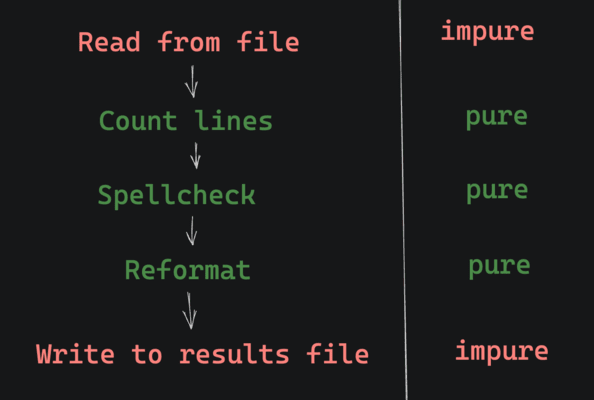

### Example of impure function:

In [8]:
def convert_case(text, target_format):
    if target_format == "uppercase":
        print(text.upper())
        return

### Example of pure functions:

In [9]:
def convert_case(text, target_format):
    if not text or not target_format:
        raise ValueError(f"no text or target format provided")
    if target_format == "uppercase":
        return text.upper()
    raise ValueError(f"unsupported format: {target_format}")

In [12]:
doc = """I *love* Markdown.
I **really love** Markdown.
I ***really really love*** Markdown."""
def remove_emphasis(doc):
    local_doc = doc
    lines = local_doc.split("\n")
    new_lines = map(remove_line_emphasis, lines)
    local_doc = "\n".join(new_lines)
    return local_doc
def remove_line_emphasis(line):
    words = line.split()
    new_words = map(remove_word_emphasis, words)
    return " ".join(new_words)
def remove_word_emphasis(word):
    return word.strip("*")

# No-Op

A **no-op** is a function that does not return anything, and is probably impure. 
If a function does not return anything, the only reason for it to exist is to perform a side effect

### Example of a **No-OP**

In [13]:
def square(x):
    x*x
print(square(5))

None


### Example of **side effect** that changes a variable outside the scope:

In [14]:
y=5
def add_to_y(x):
    global y
    y+=x
print(add_to_y(3))

None


In [4]:
def word_count_memo(document, memos):
    memos_local = memos.copy()
    if document in memos_local: 
        return memos_local[document], memos_local
    memos_local[document] = word_count(document)
    return word_count(document), memos_local
def word_count(document):
    count = len(document.split())
    return count

In [5]:
run_cases = [
    (
        "My hovercraft is full of eels",
        {
            "My hovercraft is full of eels": 6,
            "He's a lumberjack and he's okay. He sleeps all night and he works all day": 15,
        },
        (
            6,
            {
                "My hovercraft is full of eels": 6,
                "He's a lumberjack and he's okay. He sleeps all night and he works all day": 15,
            },
        ),
    ),
    (
        "Spam, spam, spam, spam, spam, spam, baked beans, spam, spam, and spam",
        {},
        (
            12,
            {
                "Spam, spam, spam, spam, spam, spam, baked beans, spam, spam, and spam": 12
            },
        ),
    ),
]

submit_cases = run_cases + [
    (
        "This is an ex-parrot",
        {"This parrot is no more": 5},
        (4, {"This parrot is no more": 5, "This is an ex-parrot": 4}),
    ),
    (
        "This doc should 'incorrectly' have 9999 words to test that the memoization is working",
        {
            "My hovercraft is full of eels": 6,
            "This doc should 'incorrectly' have 9999 words to test that the memoization is working": 9999,
        },
        (
            9999,
            {
                "My hovercraft is full of eels": 6,
                "This doc should 'incorrectly' have 9999 words to test that the memoization is working": 9999,
            },
        ),
    ),
]


def test(input_document, input_memos, expected_output):
    print("---------------------------------")
    print(f"Input document:\n  {input_document}")
    print(f"Input memos:")
    for key, value in input_memos.items():
        print(f"  {key}: {value}")
    print(f"Expected word count: {expected_output[0]}")
    print(f"Expected memos:")
    for key, value in expected_output[1].items():
        print(f"  {key}: {value}")
    input_memos_copy = input_memos.copy()
    result = word_count_memo(input_document, input_memos_copy)
    print(f"Actual word count: {result[0]}")
    print(f"Actual memos:")
    for key, value in result[1].items():
        print(f"  {key}: {value}")

    if input_memos_copy != input_memos:
        print("Mutated input memos\nFail")
        return False
    if input_memos == expected_output[1] and result[1] != expected_output[1]:
        print("Expected word count from the input memos\nFail")
        return False
    if result != expected_output:
        print("Fail")
        return False
    print("Pass")
    return True


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases


main()

---------------------------------
Input document:
  My hovercraft is full of eels
Input memos:
  My hovercraft is full of eels: 6
  He's a lumberjack and he's okay. He sleeps all night and he works all day: 15
Expected word count: 6
Expected memos:
  My hovercraft is full of eels: 6
  He's a lumberjack and he's okay. He sleeps all night and he works all day: 15
Actual word count: 6
Actual memos:
  My hovercraft is full of eels: 6
  He's a lumberjack and he's okay. He sleeps all night and he works all day: 15
Pass
---------------------------------
Input document:
  Spam, spam, spam, spam, spam, spam, baked beans, spam, spam, and spam
Input memos:
Expected word count: 12
Expected memos:
  Spam, spam, spam, spam, spam, spam, baked beans, spam, spam, and spam: 12
Actual word count: 12
Actual memos:
  Spam, spam, spam, spam, spam, spam, baked beans, spam, spam, and spam: 12
Pass
---------------------------------
Input document:
  This is an ex-parrot
Input memos:
  This parrot is no more: 5